# Семинар 15
# Метод сопряжённых градиентов (Conjugate gradient method): гадкий утёнок 

## На прошлом семинаре

1. Метод Ньютона
2. Теоремы сходимости
4. Сравнение с градиентным спуском
5. Квазиньютоновские методы

## Система линейных уравнений vs. задача безусловной миимизации
Рассмотрим задачу
$$
\min_{x \in \mathbb{R}^n} \frac{1}{2}x^{\top}Ax - b^{\top}x,
$$
где $A \in \mathbb{S}^n_{++}$.
Из необходимого условия экстремума имеем
$$
Ax^* = b
$$
Также обозначим $f'(x_k) = Ax_k - b = r_k$

## Как решить систему $Ax = b$?

- Прямые методы основаны на матричных разложениях:
    - Плотная матрица $A$: для размерностей не больше нескольких тысяч
    - Разреженная (sparse) матрица $A$: для размерностей порядка $10^4 - 10^5$
- Итерационные методы: хороши во многих случаях, единственный подход для задач с размерностью $ > 10^6$

## Немного истории...

M. Hestenes и E. Stiefel предложили *метод сопряжённых градиентов* для решения систем линейных уравнений в 1952 году как **прямой** метод. 

Также долгое время считалось, что метод представляет только теоретический интерес поскольку
- метод сопряжённых градиентов не работает на логарифмической линейке
- метод сопряжённых градиентов имеет небольшое преимущество перед исключением Гаусса при вычислениях на калькуляторе 

Метод сопряжённых градиентов необходимо рассматривать как **итерационный метод**, то есть останавливаться до точной сходимости!

Подробнее [здесь](https://www.siam.org/meetings/la09/talks/oleary.pdf)

## Метод сопряжённых направлений

В градиентном спуске направления убывания - анти-градиенты, но для функций с плохо обусловленным гессианом сходимость **медленная**.

**Идея:** двигаться вдоль направлений, которые гарантируют сходимость за $n$ шагов.

**Определение.** Множество ненулевых векторов $\{p_0, \ldots, p_l\}$ называется *сопряжённым* относительно матрицы $A \in \mathbb{S}^n_{++}$, если 
$$
p^{\top}_iAp_j = 0, \qquad i \neq j
$$

**Утверждение.** Для любой $x_0 \in \mathbb{R}^n$ последовательность $\{x_k\}$, генерируемая методом сопряжённых направлений, сходится к решению системы $Ax = b$ максимум за $n$ шагов.

```python
def ConjugateDirections(x0, A, b, p):
    x = x0
    r = A.dot(x) - b
    for i in xrange(len(p)):
        alpha = - (r.dot(p[i])) / (p[i].dot(A.dot(p[i])))
        x = x + alpha * p[i]
        r = A.dot(x) - b
    return x
```

### Примеры сопряжённых направлений

- Собственные векторы матрицы $A$
- Для любого набора из $n$ векторов можно провести аналог ортогонализации Грама-Шмидта и получить сопряжённые направления

**Вопрос:** что такое ортогонализация Грама-Шмидта? :)

### Геометрическая интерпретация (Mathematics Stack Exchange)

<center><img src="./cg.png" ></center>

## Метод сопряжённых градиентов

**Идея:** новое направление $p_k$ ищется в виде $p_k = -r_k + \beta_k p_{k-1}$, где $\beta_k$ выбирается, исходя из требования сопряжённости $p_k$ и $p_{k-1}$:
$$
\beta_k = \dfrac{p^{\top}_{k-1}Ar_k}{p^{\top}_{k-1}Ap^{\top}_{k-1}}
$$
Таким образом, для получения следующего сопряжённого направления $p_k$ необходимо хранить только сопряжённое направление $p_{k-1}$ и остаток $r_k$ с предыдущей итерации. 

**Вопрос:** как находить размер шага $\alpha_k$?

### Теоремы сходимости

**Теорема 1.** Если матрица $A$ имеет только $r$ различных собственных значений, то метод сопряжённых градиентов cойдётся за $r$ итераций.

**Теорема 2.** Имеет место следующая оценка сходимости
$$
\| x_{k+1} - x^* \|_A \leq \left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$
где $\|x\|_A = x^{\top}Ax$ и $\kappa(A) = \frac{\lambda_n(A)}{\lambda_1(A)}$ - число обусловленности матрицы $A$

**Замечание:** сравните коэффициент геометрической прогрессии с аналогом в градиентном спуске.

### Интерпретации метода сопряжённых градиентов

- Градиентный спуск в пространстве $y = Sx$, где $S = [p_0, \ldots, p_n]$, в котором матрица $A$ становится диагональной (или единичной в случае ортонормированности сопряжённых направлений)
- Поиск оптимального решения в [Крыловском подпространстве](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) $\mathcal{K}(A) = \{b, Ab, A^2b, \ldots \}$

### Улучшенная версия метода сопряжённых градиентов
На практике используются следующие формулы для шага $\alpha_k$ и коэффициента $\beta_{k}$:
$$
\alpha_k = \dfrac{r^{\top}_k r_k}{p^{\top}_{k}Ap_{k}} \qquad \beta_k = \dfrac{r^{\top}_k r_k}{r^{\top}_{k-1} r_{k-1}}
$$
**Вопрос:** чем они лучше базовой версии?

### Псевдокод метода сопряжённых градиентов
```python
def ConjugateGradientQuadratic(x0, A, b):
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) != 0:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x
```

## Метод сопряжённых градиентов для неквадратичной функции
**Идея:** использовать градиенты $f'(x_k)$ неквадратичной функции вместо остатков $r_k$ и линейный поиск шага $\alpha_k$ вместо аналитического вычисления. Получим метод Флетчера-Ривса.

```python
def ConjugateGradientFR(f, gradf, x0):
    x = x0
    grad = gradf(x)
    p = -grad
    while np.linalg.norm(gradf(x)) != 0:
        alpha = StepSearch(x, f, gradf, **kwargs)
        x = x + alpha * p
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next
        if restart_condition:
            p = -gradf(x)
    return x
```

### Теорема сходимости

**Теорема.** Пусть 
- множество уровней $\mathcal{L}$ ограничено
- существует $\gamma > 0$: $\| f'(x) \|_2 \leq \gamma$ для $x \in \mathcal{L}$
Тогда
$$
\lim_{j \to \infty} \| f'(x_{k_j}) \|_2 = 0
$$

### Перезапуск (restart)

1. Для ускорения метода сопряжённых градиентов используют технику перезапусков: удаление ранее накопленной истории и перезапуск метода с текущей точки, как будто это точка $x_0$
2. Существуют разные условия, сигнализирующие о том, что надо делать перезапуск, например
    - $k = n$
    - $\dfrac{|\langle f'(x_k), f'(x_{k-1}) \rangle |}{\| f'(x_k) \|_2^2} \geq \nu \approx 0.1$
3. Можно показать (см. Nocedal, Wright Numerical Optimization, Ch. 5, p. 125), что запуск метода Флетчера-Ривза без использования перезапусков на некоторых итерациях может приводить к крайне медленной сходимости! 
4. Метод Полака-Рибьера и его модификации лишены подобного недостатка.

### Комментарии
- Замечательная методичка "An Introduction to the Conjugate Gradient Method Without the Agonizing Pain" размещена [тут](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)
- Помимо метода Флетчера-Ривса существуют другие способы вычисления $\beta_k$: метод Полака-Рибьера, метод Хестенса-Штифеля...
- Для метода сопряжённых градиентов требуется 4 вектора: каких?
- Самой дорогой операцией является умножение матрицы на вектор
- Методика рестартов: удаление истории $(\beta_m = 0)$ и перезапуск алгоритма с текущей точки
- **Отсутствует** свойство оптимальности решения на Крыловском подпространстве 

## Эксперименты


### Квадратичная целевая функция

In [1]:
import numpy as np
n = 100
# Random
# A = np.random.randn(n, n)
# A = A.T.dot(A)
# Clustered eigenvalues
A = np.diagflat([np.ones(n//4), 10 * np.ones(n//4), 100*np.ones(n//4), 1000* np.ones(n//4)])
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5
print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)
# Hilbert matrix
# A = np.array([[1.0 / (i+j - 1) for i in xrange(1, n+1)] for j in xrange(1, n+1)])
# b = np.ones(n)

f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
x0 = np.zeros(n)

A is normal matrix: ||AA* - A*A|| = 0.0


#### Распределение собственных значений

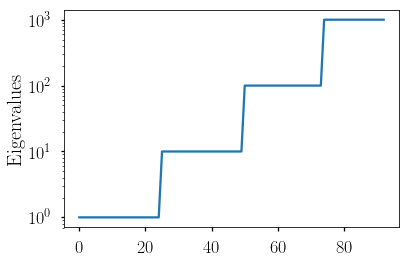

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
plt.rc("font", family='serif')
import seaborn as sns
sns.set_context("talk")

eigs = np.linalg.eigvalsh(A)
plt.semilogy(np.unique(eigs))
plt.ylabel("Eigenvalues", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Правильный ответ

In [3]:
import scipy.optimize as scopt

def callback(x, array):
    array.append(x)

In [4]:
scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, method="CG", jac=grad_f, callback=scopt_cg_callback)
x = x.x
print("||f'(x*)|| =", np.linalg.norm(A.dot(x) - b))
print("f* =", f(x))

||f'(x*)|| = 1.3519401595205795e-07
f* = -16.790300754546244


#### Реализация метода сопряжённых градиентов

In [5]:
def ConjugateGradientQuadratic(x0, A, b, tol=1e-8, callback=None):
    x = x0
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x

In [6]:
import utils
quad_cg_array = []
quad_callback = lambda x: callback(x, quad_cg_array)
x = ConjugateGradientQuadratic(x0, A, b, tol=1e-7, callback=quad_callback)
print("CG quadratic")
print("f* =", f(x))
print("||f'(x*)|| =", np.linalg.norm(A.dot(x) - b))
quad_grad_array = []
grad_callback = lambda x: callback(x, quad_grad_array)
x = utils.GradientDescent(f, grad_f, x0, 1e-7, 200, utils.quad_exact_linesearch, callback=grad_callback, A=A)
print("Gradient Descent")
print("f* =", f(x["x"]))
print("||f'(x*)|| =", np.linalg.norm(A.dot(x["x"]) - b))
print("Condition number of A =", abs(max(eigs)) / abs(min(eigs)))

CG quadratic
f* = -16.790300754546152
||f'(x*)|| = 4.299576309540847e-09
Gradient Descent
f* = -10.569846974789918
||f'(x*)|| = 4.243675032505508
Condition number of A = 1000.0000000007417


#### График сходимости

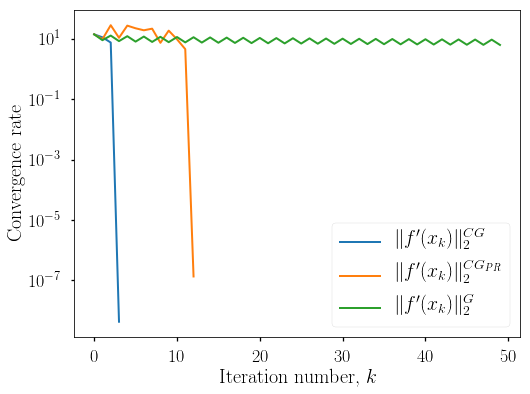

In [7]:
plt.figure(figsize=(8,6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in quad_cg_array[:50]], label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array[:50]], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in quad_grad_array[:50]], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

In [8]:
print([np.linalg.norm(grad_f(x)) for x in quad_cg_array[:4]])

[13.907237617475896, 11.100524528475958, 7.456620446198604, 4.299576309540847e-09]


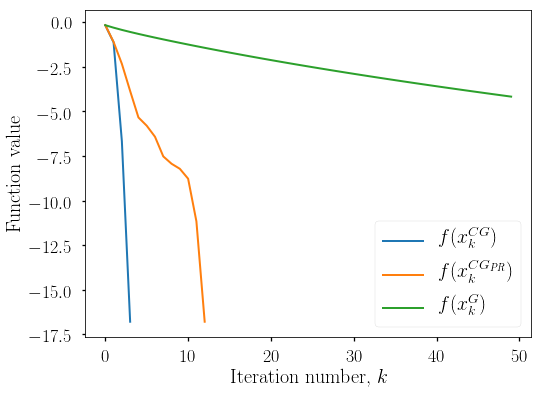

In [9]:
plt.figure(figsize=(8,6))
plt.plot([f(x) for x in quad_cg_array], label=r"$f(x^{CG}_k)$", linewidth=2)
plt.plot([f(x) for x in scopt_cg_array], label=r"$f(x^{CG_{PR}}_k)$", linewidth=2)
plt.plot([f(x) for x in quad_grad_array[:50]], label=r"$f(x^{G}_k)$", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Function value", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

### Неквадратичная функция

In [10]:
import numpy as np
import sklearn.datasets as skldata
import scipy.special as scspec

n = 300
m = 1000

X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3)
C = 1
def f(w):
    return np.linalg.norm(w)**2 / 2 +  C * np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

def grad_f(w):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]
# f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
# grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
x0 = np.zeros(n)
print("Initial function value = {}".format(f(x0)))
print("Initial gradient norm = {}".format(np.linalg.norm(grad_f(x0))))

Initial function value = 0.6931471805599454
Initial gradient norm = 2.740639498775168


#### Реализация метода Флетчера-Ривса

In [11]:
def ConjugateGradientFR(f, gradf, x0, num_iter=100, tol=1e-8, callback=None, restart=False):
    x = x0
    grad = gradf(x)
    p = -grad
    it = 0
    while np.linalg.norm(gradf(x)) > tol and it < num_iter:
        alpha = utils.backtracking(x, p, method="Wolfe", beta1=0.1, beta2=0.4, rho=0.5, f=f, grad_f=gradf)
        if alpha < 1e-18:
            break
        x = x + alpha * p
        if callback is not None:
            callback(x)
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next.copy()
        it += 1
        if restart and it % restart == 0:
            grad = gradf(x)
            p = -grad
    return x

#### График сходимости

In [12]:
import scipy.optimize as scopt

n_restart = 100

scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, tol=1e-6, method="CG", jac=grad_f, callback=scopt_cg_callback, options={"maxiter": 200})
x = x.x
print("CG by Polak-Rebiere")
print("||f'(x*)|| =", np.linalg.norm(grad_f(x)))
print("f* =", f(x))

fr_cg_array = []
fr_callback = lambda x: callback(x, fr_cg_array)
x = ConjugateGradientFR(f, grad_f, x0, tol=1e-6, num_iter=200, callback=fr_callback)
print("CG by Fletcher-Reeves")
print("||f'(x*)|| =", np.linalg.norm(grad_f(x)))
print("f* =", f(x))

fr_cg_restart_n_array = []
fr_callback = lambda x: callback(x, fr_cg_restart_n_array)
x = ConjugateGradientFR(f, grad_f, x0, tol=1e-6, num_iter=200, callback=fr_callback, restart=n//n_restart)
print("CG by Fletcher-Reeves with restart n")
print("||f'(x*)|| =", np.linalg.norm(grad_f(x)))
print("f* =", f(x))

grad_array = []
grad_callback = lambda x: callback(x, grad_array)
x = utils.GradientDescent(f, grad_f, x0, 1e-6, 200, utils.backtracking, callback=grad_callback, 
                         method="Wolfe", rho=0.5, beta1=0.1, beta2=0.4)
print("Gradient Descent")
print("||f'(x*)|| =", np.linalg.norm(grad_f(x["x"])))
print("f* =", f(x["x"]))

CG by Polak-Rebiere
||f'(x*)|| = 1.364609198238202e-06
f* = 0.4723284913659089
CG by Fletcher-Reeves
||f'(x*)|| = 7.997932755819714e-07
f* = 0.47232849136549643
CG by Fletcher-Reeves with restart n
||f'(x*)|| = 9.23497193915876e-07
f* = 0.47232849136556115
Gradient Descent
||f'(x*)|| = 1.2039188951050682e-05
f* = 0.47232849139523597


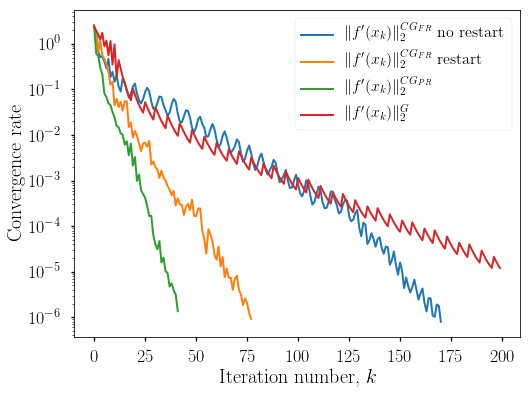

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in fr_cg_array], label=r"$\|f'(x_k)\|^{CG_{FR}}_2$ no restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in fr_cg_restart_n_array], label=r"$\|f'(x_k)\|^{CG_{FR}}_2$ restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)

plt.semilogy([np.linalg.norm(grad_f(x)) for x in grad_array], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Время выполнения

In [14]:
%timeit scopt.minimize(f, x0, method="CG", tol=1e-6, jac=grad_f, options={"maxiter": 200})
%timeit ConjugateGradientFR(f, grad_f, x0, tol=1e-6, num_iter=200)
%timeit ConjugateGradientFR(f, grad_f, x0, tol=1e-6, num_iter=200, restart=n//n_restart)
%timeit utils.GradientDescent(f, grad_f, x0, 1e-6, 200, utils.backtracking, method="Wolfe", rho=0.5, beta1=0.1, beta2=0.4)

15 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
311 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
116 ms ± 4.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
310 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Резюме

1. Сопряжённые направления
2. Метод сопряжённых градиентов
3. Сходимость
4. Эксперименты